<div><font face="Times New Roman" size=7><br><br>
<center>
Spectral Clustering
<center><br></div>
 

### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Alireza Gargoori for any questions you have or other inconveniences.*  <br>
*Telegram ID: @alregamo*  <br>
*Email: alireza.agm@gmail.com* <br>

<font face="Arial" size=4><br>
    
One type of common methods for clustering are the <b>Spectral Clustering</b> methods, which we would learn in this execise.
<br><br>
Spectral Clustering is a type of clustering algorithm in machine learning that <b>uses eigenvectors of a similarity matrix</b> to divide a set of data points into clusters. The basic idea behind spectral clustering is to use the eigenvectors of the Laplacian matrix of a graph to represent the data points and find clusters by applying k-means or another clustering algorithm to the eigenvectors. <br><br>
    
<div> <br>
<center>
<img src="https://images.squarespace-cdn.com/content/v1/5d782753c70af105c29a9b14/1608653466446-YC3DJUQR7FDU35XM90AE/shutterstock_1410280415.jpg?format=1000w" width="700">
</center>
</div><br>
      
Consider the matrix <b>$W$</b> representing the similarity of data points, where $(i,j)$ entry is non-zero if samples $(x^{(i)}, x^{(j)})$ are in the mutual KNN (k-nearest neighbors) of each other.<br><br>
    $$W_{ij} = \begin{cases}
    1, & x^{(i)} \in KNN \{x^{(j)}\} \hspace{3mm} AND \hspace{3mm} x^{(j)} \in KNN \{x^{(i)}\} \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Another method to define <b>$W$</b> is to use a fully connected graph, where the value of its entries are obtained from a function which measures the similarity of these samples.<br><br>
    $$W_{ij} =  k(x^{(i)}, x^{(j)})$$ <br><br>
    where $k(x^{(i)}, x^{(j)})$ is a function to measure the similarity of two samples. An example of this function could be the <b>Radial Basis Function (RBF)</b>, defined as:
    $$k(x^{(i)}, x^{(j)}) = exp(-\gamma \lVert x^{(i)} - x^{(j)} \rVert)$$
   <br> We call matrix <b>$W$</b> the adjacency matrix. (There are other types of definitions for this matrix, like the $\epsilon$-neighborhood graph, simple KNN graph, etc.) <br><br>
    The degree of each vertex in the graph is defined as $g_i = \sum_{j}^{} w_{ij}$.
    Also, consider the diagonal matrix <b>$G$</b>, defined as: <br><br>
    $$G_{ij} = \begin{cases}
    g_i, & i=j \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Now we are ready to define the <b>Laplacian</b> matrix <b>$L$</b>:
    $$L = G - W $$<br><br><br>
    It can be shown the eigenvectors of <b>$L$</b> corresponding to the 𝑚 smallest eigenvalues are appropriate for clustering. In other words, we first compute the 𝑚 smallest eigenvalues $\lambda_i$ and their corresponding eigenvectors $\phi_i$. Let $\Phi \in \mathbb{R} ^{p\times m}$ be a matrix consisting of $\{\phi_i\}_{i=1}^{m}$, i.e. the first(smallest)  eigenvectors of <b>$L$</b>:<br><br>
    $$\Phi(x^{(i)}) = [\phi_1(x^{(i)}), \phi_2(x^{(i)}), ..., \phi_m(x^{(i)})]^T \in \mathbb{R}^m$$ <br>
    In other words, we transform the original data $x^{(i)}$ from $\mathbb{R}^{p}$ to $\mathbb{R}^{m}$ through the first m eigenvectors of <b>$L$</b>: it is a nonlinear transformation. The $\it{i}$th row of $\Phi$ represents the $\it{i}$th data point in the new feature space. This step is also called Laplacian eigenmap, which is the key step in spectral clustering.
    <br><br> Now, in the final step, we need to apply K-means clustering to the rows of $\Phi$ to group the data into m clusters.

<font face="Arial" size=4>
<br>In summary, the procedure consists of 4 steps: <br><br>
    <b>1.</b> Constuct the adjacency matrix <b>$W$</b>. <br> <br>
    <b>2.</b> Find the corresponding laplacian matrix <b>$L$</b>. <br><br>
    <b>3.</b> Find the m smallest eigenvalues and their corresponding eigenvectors $\{\phi_i\}_{i=1}^{m}$. Transform the samples in the original feature space into the new one, using the matrix $\Phi$. <br><br>
    <b>4.</b> Apply K-Means in this new feature space. <br><br>

## Part (A) (Bonus)
<font face="Arial" size=4>
<br>Prove that Laplacian Matrix is positive semi-definite. (Therefore, all the eigenvalues of <b>$L$</b> are $\geq 0$)

## Your Answer


the answer is in the pdf file named <code>"part A spectral".</code>

## Part (B)
<font face="Arial" size=4> <br>
We stated that the transformation must be done using the eigenvectos corresponding to the smallest eigenvalues of laplacian matrix. This can be proved mathematically; however, we want to illustrate it with a simple example. <br>

It can be shown that as the eigenvalues of the laplacian matrix gets closer to zero, the graph is more disconnected! <br>
Explain the above statement in the following gif. In other words, explain the effect of adding edges to the graph on the eigenvalues of the laplacian matrix:
<div> <br>
<center>
<img src="spectral.gif" width="700">
</center>
</div><br>

the number of zero eigenvalues corresponded to the number of disconnected sets.

<font face="Arial" size=4>
Why do you think the second eigenvalue is close to zero in the following graph?
<div> <br>
<center>
<img src="spectral_final.png" width="700">
</center>
</div><br>

becuase if delete the 5 and 0 edge, the number of zero eigenvalues becomes 2 and the sets of graph is close to be disconnected.

## Part (C)
<font face="Arial" size=4> <br>
Here we want to compare the results of spectral clustering to the typical K-Means clustering. Consider the following dataset:

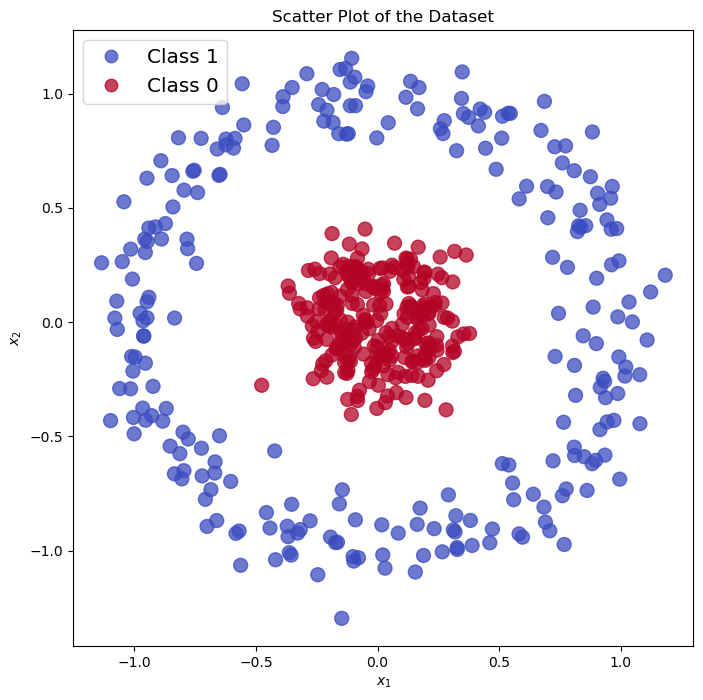

In [29]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt


X, labels = make_circles(500, factor=0.2, noise=0.1, random_state=1)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

<font face="Arial" size=4>
Assume that the true labels are unknown, and we need to cluster the samples into two clusters. Apply K-Means algorithm with $K=2$ on the samples and plot the resulting clusters. <br> What do you think about the clusters from K-Means? Do the results match with the true labels?

In [ ]:
###########
>> from sklearn.cluster import KMeans
>>> import numpy as np
>>> X = np.array([[1, 2], [1, 4], [1, 0],
...               [10, 2], [10, 4], [10, 0]])
>>> kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
>>> kmeans.labels_
array([1, 1, 1, 0, 0, 0], dtype=int32)
>>> kmeans.predict([[0, 0], [12, 3]])
array([1, 0], dtype=int32)
>>> kmeans.cluster_centers_
array([[10.,  2.],
       [ 1.,  2.]])

D:\Program Files\anaconda2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Program Files\anaconda2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


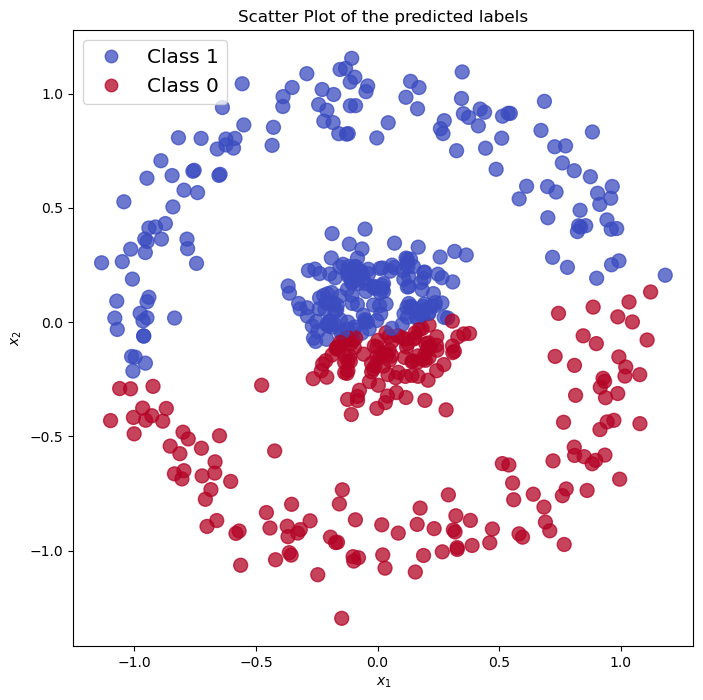

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2).fit(X)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c= kmeans.labels_, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the predicted labels")
plt.show()

<font face="Arial" size=4> <br>
Now apply spectral clustering method on this dataset. You can use <code>sklearn.cluster.SpectralClustering</code> in this part. Also, use the KNN adjacency matrix for <b>$W$</b>.

D:\Program Files\anaconda2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


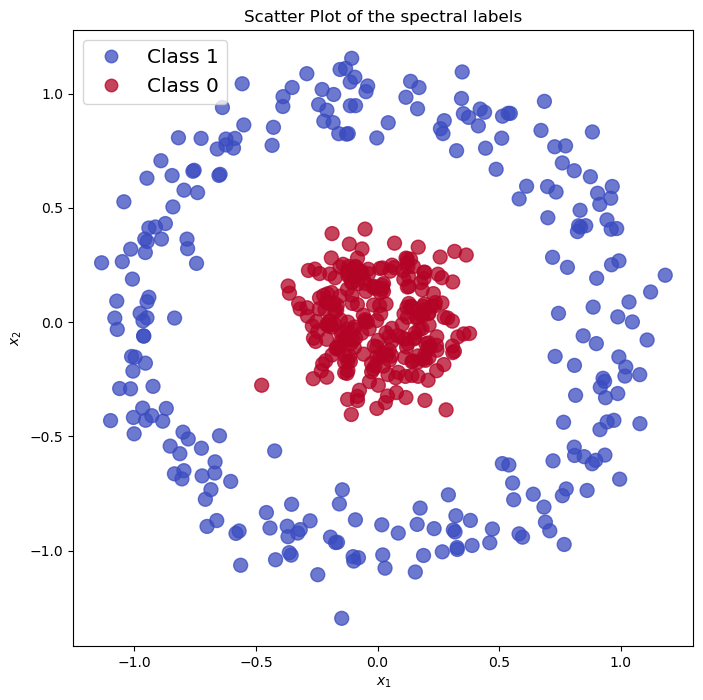

In [33]:
from sklearn.cluster import SpectralClustering
# Building the clustering model
spectral_model = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')

# Training the model and Storing the predicted cluster labels
labels_spectral = spectral_model.fit_predict(X)


plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c= labels_spectral, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the spectral labels")
plt.show()


<font face="Arial" size=4> <br>
Change the adjacency matrix as the fully connected graph with rbf as the similarity measurement function. (Note that you can set this through the <code>affinity</code> parameter of the spectral clustering model.)

D:\Program Files\anaconda2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


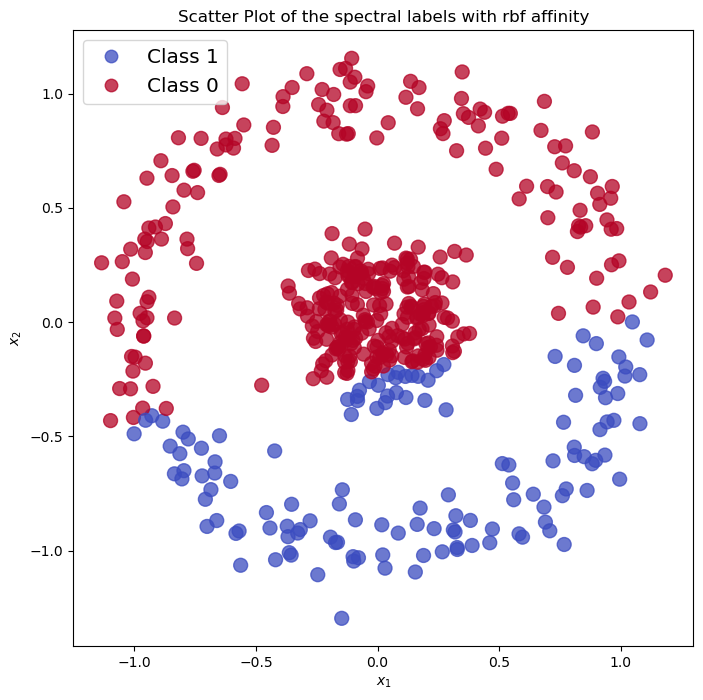

In [34]:
## Your Code
from sklearn.cluster import SpectralClustering
# Building the clustering model
spectral_model = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_spectral = spectral_model.fit_predict(X)


plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c= labels_spectral, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the spectral labels with rbf affinity")
plt.show()


<font face="Arial" size=4> <br>

Compare the results of K-Means model vs. Spectral Clustering methods. Also, mention the effect of <code>rbf</code> adjacency matrix on the result of spectral clustering model.

In [ ]:
## Your Answer

# Part (D)

<font face="Arial" size=4><br>
Explain the pros and cons of spectral clustering methods. (Feel free to search more about its advantages and disadvantages through internet, but mention your sources.)

In [ ]:
## Your Answer

# Part (E): Clustering on Cancer Gene Expression RNA-seq dataset

### Part (E.1): Clustering
<font face="Arial" size=4><br>
This dataset is from the UCI Machine Learning repository. This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set. It is a random extraction of gene expressions of patients having different types of tumor: 
    
BRCA (breast invasive carcinoma) <br>
KIRC (kidney renal clear cell carcinoma) <br>
COAD (colon adenocarcinoma) <br>
LUAD (lung adenocarcinoma) <br>
PRAD (prostate adenocarcinoma) <br> <br>
    
    
There are 801 instances with 20531 attributes, which are the gene expressions among different patients with each of this tumors. The data can be downloaded here: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

<font face="Arial" size=4>
Assume that the true labels are unknown and we cannot use classification methods to distinguish cancer types. Use Spectral Clustering method and try to cluster the data as best as you can. You are allowed to use <code>sklearn.cluster.SpectralClustering</code> for this purpose. The choice of hyperparameters are on your own.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./data.csv')

In [ ]:
df.head()

In [3]:
df.drop('Unnamed: 0',axis =1, inplace = True)

In [4]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
df.describe()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB


In [7]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors')

# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(df)


In [8]:
labels_nn

array([4, 3, 4, 4, 1, 4, 2, 4, 1, 4, 1, 2, 4, 1, 1, 1, 3, 2, 2, 4, 1, 2,
       3, 1, 2, 3, 0, 1, 1, 1, 1, 1, 2, 1, 4, 1, 2, 3, 1, 1, 2, 4, 4, 2,
       2, 1, 4, 0, 1, 3, 1, 3, 1, 4, 0, 1, 1, 0, 2, 1, 3, 2, 1, 3, 4, 0,
       1, 4, 2, 1, 2, 1, 1, 3, 1, 3, 1, 2, 4, 0, 1, 4, 1, 1, 4, 4, 1, 1,
       2, 1, 4, 4, 1, 1, 1, 4, 0, 1, 4, 1, 1, 2, 1, 2, 3, 2, 3, 0, 3, 3,
       4, 1, 3, 4, 1, 2, 2, 2, 1, 1, 3, 2, 3, 1, 4, 4, 4, 1, 2, 1, 0, 1,
       0, 1, 1, 2, 3, 1, 2, 0, 1, 4, 1, 2, 3, 0, 4, 1, 3, 3, 3, 3, 1, 1,
       3, 1, 1, 4, 4, 3, 4, 3, 2, 1, 4, 3, 0, 2, 3, 1, 2, 3, 1, 3, 1, 1,
       1, 4, 1, 2, 0, 2, 1, 4, 4, 4, 3, 3, 1, 3, 3, 2, 3, 4, 3, 1, 1, 1,
       3, 3, 1, 2, 2, 2, 2, 4, 1, 4, 1, 3, 3, 1, 4, 1, 4, 1, 1, 1, 3, 1,
       2, 3, 2, 2, 3, 1, 2, 4, 1, 3, 3, 4, 0, 1, 2, 4, 2, 0, 1, 2, 2, 3,
       4, 4, 3, 3, 2, 1, 1, 0, 1, 4, 0, 1, 4, 2, 4, 4, 4, 1, 0, 0, 3, 0,
       0, 4, 3, 1, 1, 2, 2, 1, 0, 4, 2, 4, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3, 4, 1,

### Part (E.2): Evaluation of Clustering Algorithm

<font face="Arial" size=4><br>
Search about the metrics that we can use for clustering purposes, given that we have the true labels of the data and we want to assess the performance of our clustering method. Give a short explanation about the <code>adjusted rand index(ARI)</code> and <code>normalized mutual information(NMI)</code> metrics and evaluate your model with these metrics. You are allowed to use <code>sklearn.metrics</code> in this part.

In [ ]:
## Your Answer

In [10]:
labels_true = pd.read_csv('./labels.csv')

In [11]:
labels_true.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [12]:
labels_true.drop('Unnamed: 0',axis = 1, inplace =True)
labels_true

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [13]:
labels_true.shape

(801, 1)

In [14]:
##ARI
from sklearn.metrics import rand_score, adjusted_rand_score
labels_pred = labels_nn

RI = rand_score(labels_true.values.reshape(-1,), labels_pred)
ARI = adjusted_rand_score(labels_true.values.reshape(-1,), labels_pred)

In [15]:
print('ARI = ', ARI)
print('RI = ', RI)

ARI =  0.9962578040012737
RI =  0.9986267166042447


In [18]:
#NMI
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score
MI = mutual_info_score(labels_true.values.reshape(-1,), labels_pred)
NMI = normalized_mutual_info_score(labels_true.values.reshape(-1,), labels_pred)

In [19]:
print('NMI = ', NMI)
print('MI = ', MI)

NMI =  0.9947747622537488
MI =  1.503381229285536


### Part (E.3): Visualization

<font face="Arial" size=4><br>
Visualize the ground truth labels and the predictions of your model in 2 figures. You can use <code>PCA</code> for dimensionality reduction before visualization. Also, you can use <code>t-SNE</code> from <code>sklearn.manifold.TSNE</code> instead. Other methods such as <code>UMAP</code> are accepted as well.

In [21]:
## Your Code
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['PC1', 'PC2']

df_principal.head()

,PC1,PC2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064608
3,-84.770785,-73.244566
4,-69.560171,-9.612940


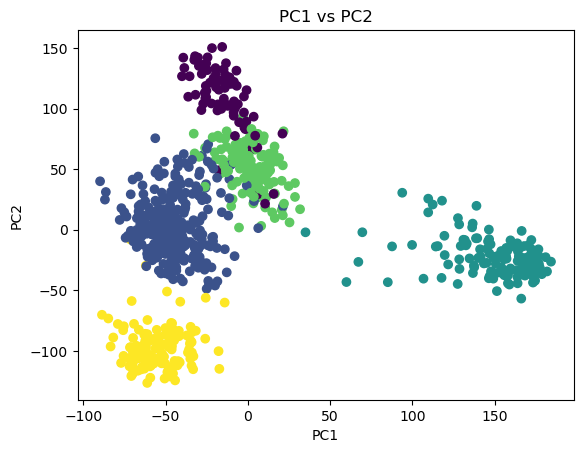

In [23]:
#Visualize the ground truth labels of your model in 2 figures
plt.scatter(x = df_principal.PC1, y = df_principal.PC2, c = labels_nn)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2")

plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
labels_true = enc.fit_transform(labels_true)

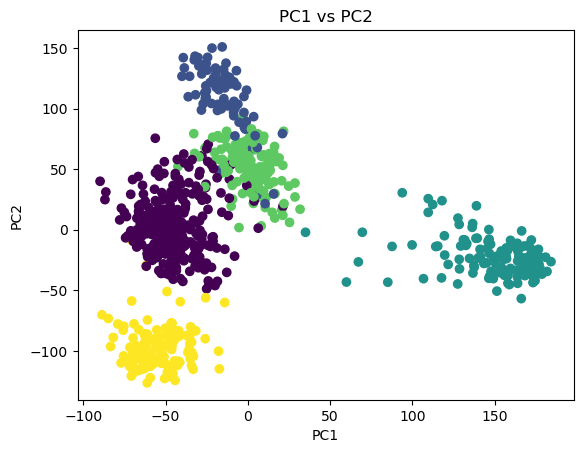

In [28]:
#Visualize the ground truth labels  in 2 figures
plt.scatter(x = df_principal.PC1, y = df_principal.PC2, c = labels_true)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2")

plt.show()